In [1]:
import pandas as pd
from os import listdir
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##Importing Multiple files - 12 in this case
files = [file for file in os.listdir("./Sales_Data")]
all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+ file, header=0)
    all_data = pd.concat([all_data, df])
    
all_data.to_csv("all_data.csv", index = False)

In [3]:
cleaned_data = pd.read_csv("all_data.csv").dropna()

In [4]:
cleaned_data.to_csv("all_data.csv", index = False, mode='w+')
cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
temp_df = cleaned_data[cleaned_data['Quantity Ordered'] != 'Quantity Ordered']
temp_df = cleaned_data[cleaned_data['Price Each'] != 'Price Each']
cleaned_data['Quantity Ordered']= temp_df["Quantity Ordered"].astype('int32')
cleaned_data['Price Each']= temp_df['Price Each'].astype('float64')
cleaned_data['Total_Sale'] = cleaned_data['Quantity Ordered'] * cleaned_data['Price Each']
cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Sale
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [6]:
cleaned_data['Month'] = cleaned_data['Order Date'].str[0:2]
cleaned_data = cleaned_data[cleaned_data['Month'] != 'Or']
cleaned_data['Month'] = cleaned_data['Month'].astype('int32')

In [7]:
results = cleaned_data.groupby('Month').sum()
months = range(1, 13)

<BarContainer object of 12 artists>

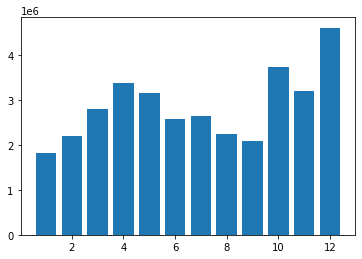

In [8]:
#Months having highest number of Sales
plt.bar(months, results["Total_Sale"])

In [38]:
cleaned_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Sale,Month,Cities
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles
6,176562,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",11.95,4,San Francisco
7,176563,Bose SoundSport Headphones,1.0,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",99.99,4,Seattle
8,176564,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",11.95,4,Atlanta
9,176565,Macbook Pro Laptop,1.0,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",1700.00,4,San Francisco
10,176566,Wired Headphones,1.0,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",11.99,4,Boston


In [9]:
cleaned_data['Cities'] = cleaned_data['Purchase Address'].str.split(',').str[1]
City = [Cities for Cities, df in cleaned_data.groupby('Cities')]

In [10]:
plt.plot(City, res["Total_Sale"])
plt.xticks(City, rotation='vertical', size=8)
plt.show()

NameError: name 'res' is not defined

In [11]:
#What time the advertisement should be dislayed
cleaned_data['Order Date'] = pd.to_datetime(cleaned_data['Order Date'])
cleaned_data['Hour'] = cleaned_data['Order Date'].dt.hour
cleaned_data['Minute'] = cleaned_data['Order Date'].dt.minute
cleaned_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total_Sale,Month,Cities,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,9,27


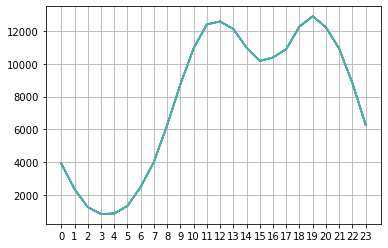

In [12]:
hours = [Hour for Hour, df in cleaned_data.groupby('Hour')]
plt.plot(hours, cleaned_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.show()

In [22]:
#What products are most often sold
df = cleaned_data[cleaned_data["Order ID"].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: '.'.join(x))

<ipython-input-22-fd23300f32bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: '.'.join(x))


In [27]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,Google Phone.Wired Headphones
18,176574,Google Phone.USB-C Charging Cable
30,176585,Bose SoundSport Headphones.Bose SoundSport Hea...
32,176586,AAA Batteries (4-pack).Google Phone
119,176672,Lightning Charging Cable.USB-C Charging Cable


In [40]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

print(count)

Counter()


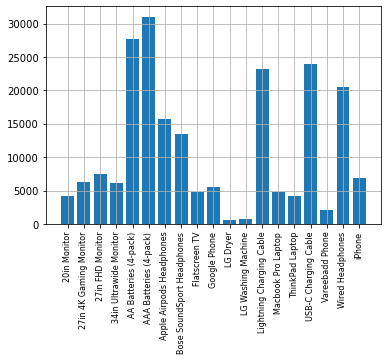

In [67]:
##What Product sold the most
product_group = cleaned_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.grid()
plt.show()

<ipython-input-73-0c2b65ebbfa0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


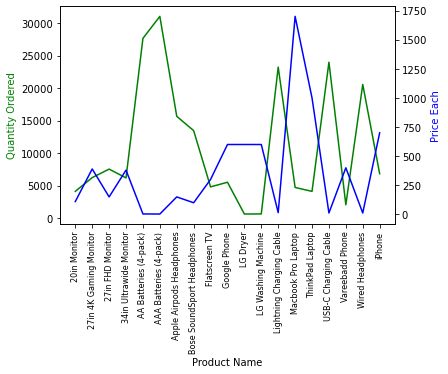

In [73]:
prices = cleaned_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(products, quantity_ordered, 'g-')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()

In [ ]:
##I would like to thank Mr. Keith Galli as this code is an emulation of his tutorial from YouTube.##